In [1]:
import numpy as np
from keras import datasets
from keras.utils import np_utils
from keras import models, layers
import matplotlib.pyplot as plt

# Fashion MNIST 데이타를 가지고 레이어 2개 이상의 NN을 만들어보자

In [2]:
(X_train,y_train),(X_test,y_test) = datasets.fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [3]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

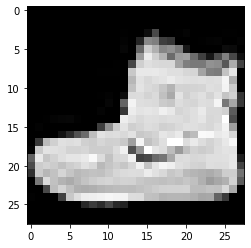

In [4]:
plt.imshow(X_train[0],cmap='gray')

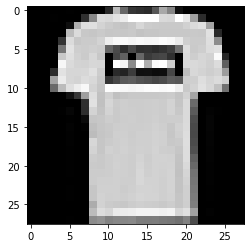

In [5]:
plt.imshow(X_train[1],cmap='gray')

#2. X입력 데이타에 전처리 과정이 필요하다 ToTensor()로 스케일링이 안됨

#####2-1. reshape 일자로 펼침

In [6]:
X_train.shape # batch_size를 사용안해서 4차원이 아니라 3차원으로 나옴.

(60000, 28, 28)

In [7]:
L,W,H = X_train.shape
print(L)
print(W)
print(H)

60000
28
28


In [8]:
X_train = X_train.reshape(-1,W*H)
X_test = X_test.reshape(-1,W*H)
print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


#####2-2. Scaling 작업

In [9]:
X_train = X_train/255
X_test = X_test/255

In [10]:
print(X_train)
print(X_test)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


#3. y값 전처리

One hot Encoding

In [11]:
Y_train = np_utils.to_categorical(y_train)
Y_test = np_utils.to_categorical(y_test)
print(Y_train[0])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


#4. Settings Parameters

In [12]:
input_size = W*H
first_hidden_size = 100 #중간 출력 갯수
second_hidden_size = 50 #중간 출력 갯수
num_classes = 10
num_out = num_classes
num_epochs = 30
batch_size = 100

#5. Constructor Model

In [13]:
model = models.Sequential()
model.add(layers.Dense(first_hidden_size, activation='relu', input_shape=(input_size,))) #FCL과 같은 부분이다.
model.add(layers.Dropout(0.5)) # 가지치기 ... 
model.add(layers.Dense(second_hidden_size, activation='relu')) # 2번째는 지정안한다.
model.add(layers.Dropout(0.25)) # 엣지 불필요한 엣지 없애기
model.add(layers.Dense(num_classes, activation='softmax')) # 아웃풋으로 num_classes, 인풋으로 hidden으로 들어감

#6. Compile

In [14]:
model.compile('sgd','categorical_crossentropy',metrics=['accuracy'])

#7. Training

In [15]:
# history : 트레이닝 할때 나오는 모든 로그 메세지들을 다 모아서 리턴한다. 객체정보이다.
history = model.fit(X_train, Y_train, epochs=num_epochs, batch_size=batch_size,validation_split=0.2)

Epoch 1/30
480/480 [==============================] - 3s 3ms/step - loss: 1.9069 - accuracy: 0.3145 - val_loss: 0.9511 - val_accuracy: 0.6810
Epoch 2/30
480/480 [==============================] - 1s 3ms/step - loss: 1.1485 - accuracy: 0.5798 - val_loss: 0.7760 - val_accuracy: 0.7178
Epoch 3/30
480/480 [==============================] - 1s 3ms/step - loss: 0.9688 - accuracy: 0.6397 - val_loss: 0.7001 - val_accuracy: 0.7452
Epoch 4/30
480/480 [==============================] - 1s 3ms/step - loss: 0.8845 - accuracy: 0.6768 - val_loss: 0.6564 - val_accuracy: 0.7676
Epoch 5/30
480/480 [==============================] - 1s 3ms/step - loss: 0.8238 - accuracy: 0.7016 - val_loss: 0.6160 - val_accuracy: 0.7807
Epoch 6/30
480/480 [==============================] - 1s 3ms/step - loss: 0.7750 - accuracy: 0.7154 - val_loss: 0.5834 - val_accuracy: 0.7921
Epoch 7/30
480/480 [==============================] - 1s 3ms/step - loss: 0.7376 - accuracy: 0.7357 - val_loss: 0.5614 - val_accuracy: 0.7981
Epoch 

#8. Evaluation

In [16]:
model_performance = model.evaluate(X_test,Y_test,batch_size=batch_size)
print(f'loss:{model_performance[0]}, accuracy:{model_performance[1]}')
print(*model_performance)

100/100 [==============================] - 0s 2ms/step - loss: 0.4312 - accuracy: 0.8438
loss:0.4312478005886078, accuracy:0.8438000082969666
0.4312478005886078 0.8438000082969666


#9. Loss and Accuracy Visulization

In [17]:
# loss 관련된 plot 함수
def plot_loss(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch') # X 측이 늘어남에 따라서 Y축이 얼마나 떨어지는가가 궁금한것이다.
    plt.legend(['Train','Validation'])
    
def plot_acc(history):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train','Validation'])

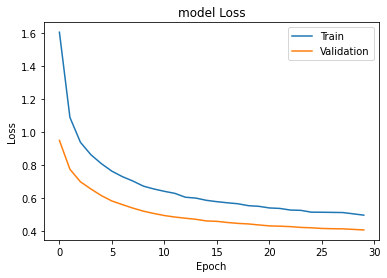

In [18]:
plot_loss(history)

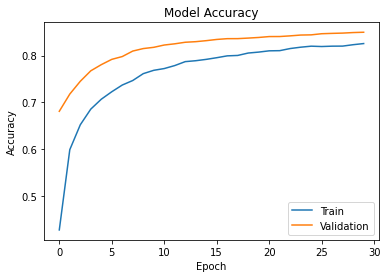

In [19]:
plot_acc(history)

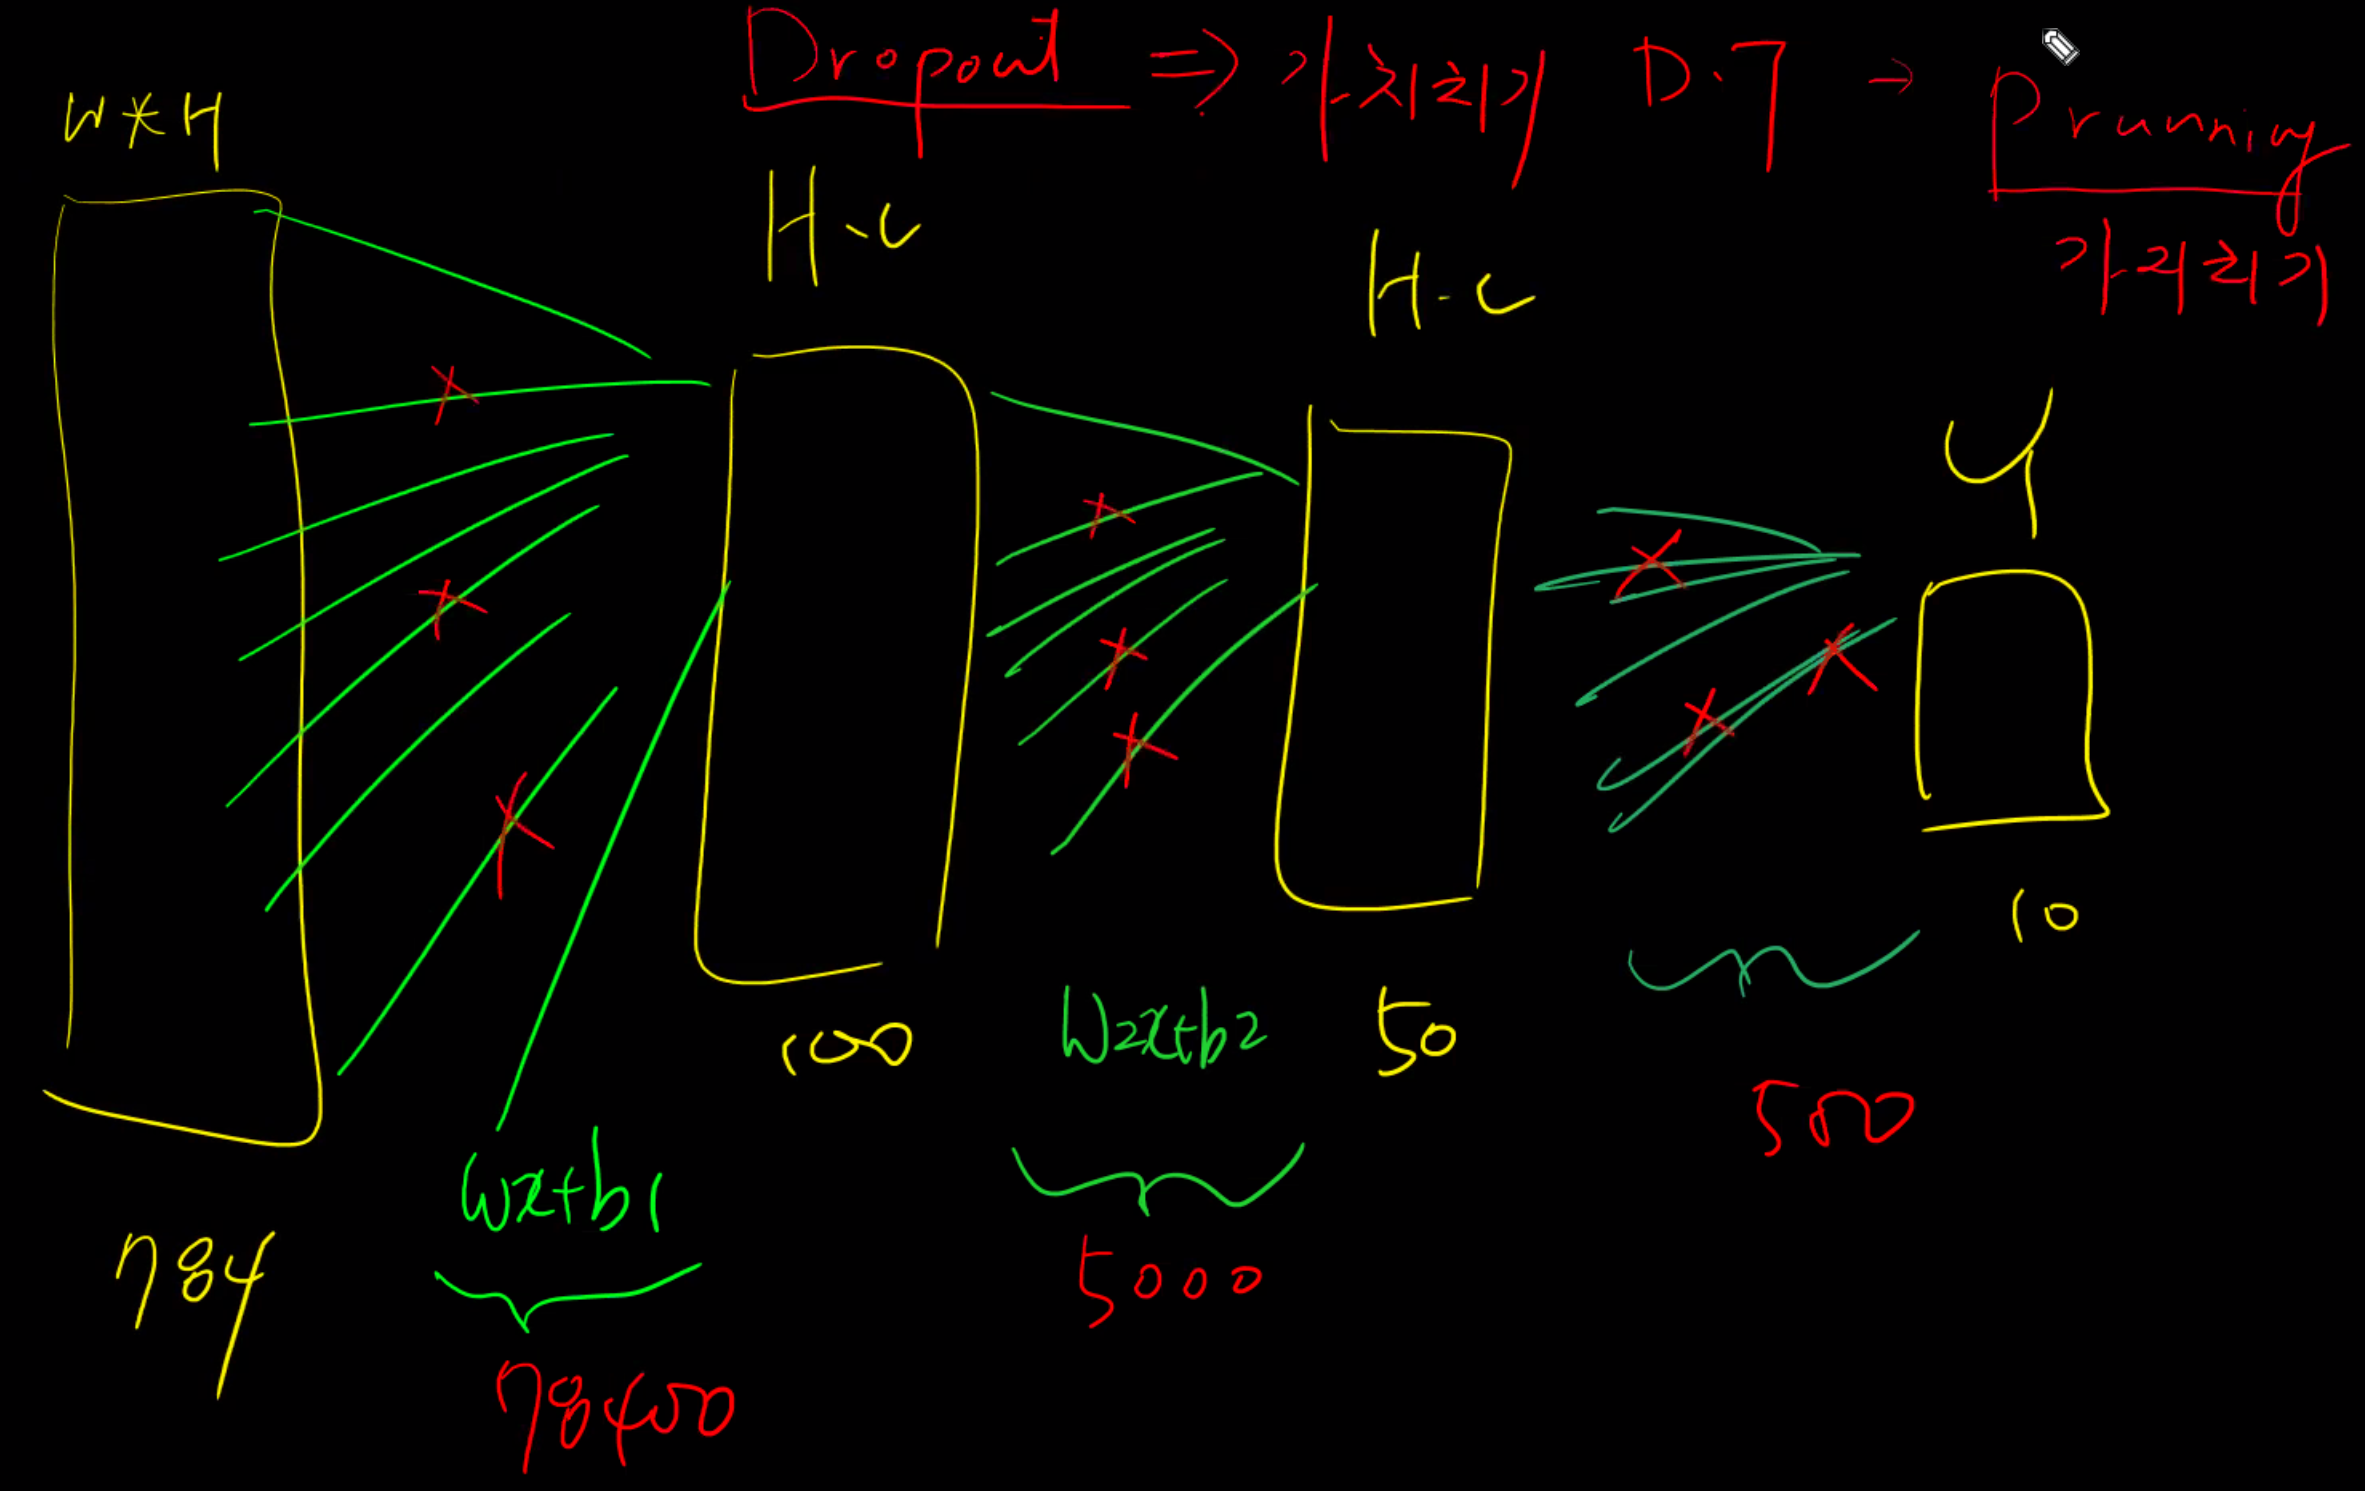

DT에서 가지치기 했던 데이터를 여기서도 dropout으로 가지칠수 있다.

#Image Data Plotting
  1차원으로 전처리 해준 데이터를 다시 2차원으로 돌려놓고 그 다음에 이미지를 출력해 볼 수 있다.

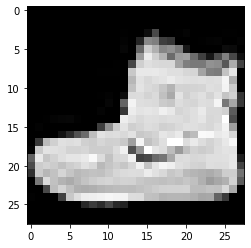

In [21]:
plt.imshow(X_train[0].reshape(28,28), cmap='gray')

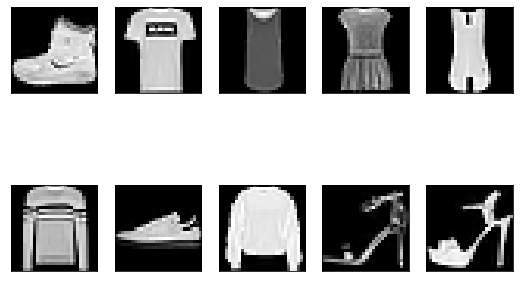

In [23]:
row = 2
col = 5

grid = range(10)
fig, axs = plt.subplots(nrows=row, ncols=col, figsize=(9,6),
                       subplot_kw={'xticks':[ ], 'yticks':[]}) 

for ax, index in zip(axs.flat,grid): 
    ax.imshow(X_train[index].reshape(28,28), cmap='gray')
plt.show()